# Dog Cat Classifier

### Importing the libraries

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [7]:
tf.__version__

'2.18.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [12]:
#Using Keras’ ImageDataGenerator to preprocess and augment images for training
#a deep learning model. It rescales pixel values to [0,1], applies transformations
#like shearing, zooming, and horizontal flipping, and
#loads images from the 'dataset/training_set' directory.
#The images are resized to 64x64 pixels, processed in batches of 32, and
#labeled for binary classification.
#This approach helps improve model generalization by
#introducing variations in the training data while efficiently handling large datasets using batch processing.
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [15]:
#Same process as sbove
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                           shuffle=False)

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [19]:
#Creating a Convolutional Neural Network (CNN) model using TensorFlow/Keras.
cnn = tf.keras.models.Sequential()

#tf.keras.models.Sequential() initializes a sequential model,
#which means layers will be added one after another in a linear stack.

### Step 1 - Convolution

In [26]:
#adding a Convolutional Layer to the CNN model.
#This layer extracts low-level features (like edges and textures) from the input image, helping the CNN recognize patterns for classification.
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [28]:
### Step 2 - Pooling

In [30]:
#adding a Max Pooling layer to the CNN model
#Reduces computational complexity and prevents overfitting and helps CNN to focus on the most important features.
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [33]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [36]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [39]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [42]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [46]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [49]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 97ms/step - accuracy: 0.5480 - loss: 0.6867 - val_accuracy: 0.5815 - val_loss: 0.6636
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 99ms/step - accuracy: 0.6006 - loss: 0.6630 - val_accuracy: 0.6285 - val_loss: 0.6318
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 103ms/step - accuracy: 0.6728 - loss: 0.6093 - val_accuracy: 0.7010 - val_loss: 0.5726
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 27s 107ms/step - accuracy: 0.7084 - loss: 0.5597 - val_accuracy: 0.7520 - val_loss: 0.5238
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 126ms/step - accuracy: 0.7421 - loss: 0.5082 - val_accuracy: 0.7775 - val_loss: 0.4808
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 37s 147ms/step - accuracy: 0.7688 - loss: 0.4784 - val_accuracy: 0.7785 - val_loss: 0.4579
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 38s 151ms/step - accuracy: 0.7818 - loss: 0.4551 - val_accuracy: 0.7895 - val_loss: 0.4743
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 163ms/step - accuracy: 0.7874 - loss: 0.4476 - val_a

## Part 4 - Modal Evaluation

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step
 Model Accuracy: 0.8130
 Precision: 0.7703
 Recall: 0.8920
 F1-score: 0.8267

🔍 Classification Report:

              precision    recall  f1-score   support

        cats       0.87      0.73      0.80      1000
        dogs       0.77      0.89      0.83      1000

    accuracy                           0.81      2000
   macro avg       0.82      0.81      0.81      2000
weighted avg       0.82      0.81      0.81      2000



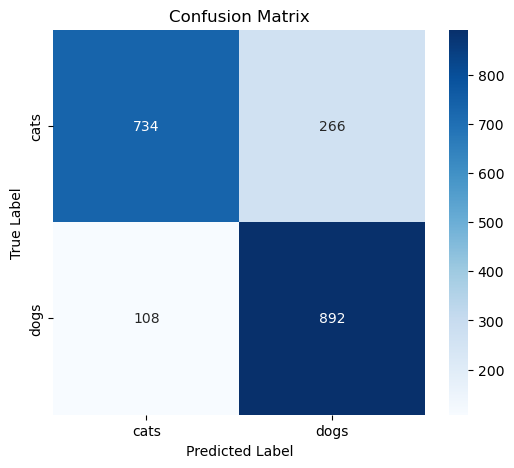

In [51]:
true_labels = test_set.classes
class_labels = list(test_set.class_indices.keys())  # ['cats', 'dogs']

# Predicting using the trained model
predictions = cnn.predict(test_set, verbose=1)
pred_labels = (predictions > 0.5).astype(int).flatten()  # Converting probabilities to binary labels

# Calculating Performance Metrics
accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels)
recall = recall_score(true_labels, pred_labels)
f1 = f1_score(true_labels, pred_labels)

print(f" Model Accuracy: {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall: {recall:.4f}")
print(f" F1-score: {f1:.4f}")

# Printing Classification Report
print("\n🔍 Classification Report:\n")
print(classification_report(true_labels, pred_labels, target_names=class_labels))

# Generating Confusion Matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plotting Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Part 5 - Making a single prediction

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

In [ ]:
print(prediction)